### Starting Off

We know that using test train split is a good way to measure the accuracy of your model. Is this the best way though? What are some potential problems with test train split?  

Think about how we get the testing data and issues with sampling and variance

# Implementing a Decision Tree Classifier

## Agenda

- Create and visualize a Decision Tree Classifier
- Utilize GridsearchCV to find the best hyperparameters of the model
- Discuss the role of Cross validation in the process

In [54]:
# Load libraries
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import make_scorer, accuracy_score #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import GridSearchCV

In [55]:
# Read in data and split data to be used in the models
titanic = pd.read_csv('cleaned_titanic.csv', index_col='PassengerId')

# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

# Create a list of the features being used in the 
feature_cols = X.columns

In [56]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [57]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()



Let's look at the default settings for this model

In [58]:
clf

DecisionTreeClassifier()

In [59]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.9841897233201581
Testing F1 Score: 0.7529411764705881


## Visualizing the decision tree

In [60]:
import graphviz

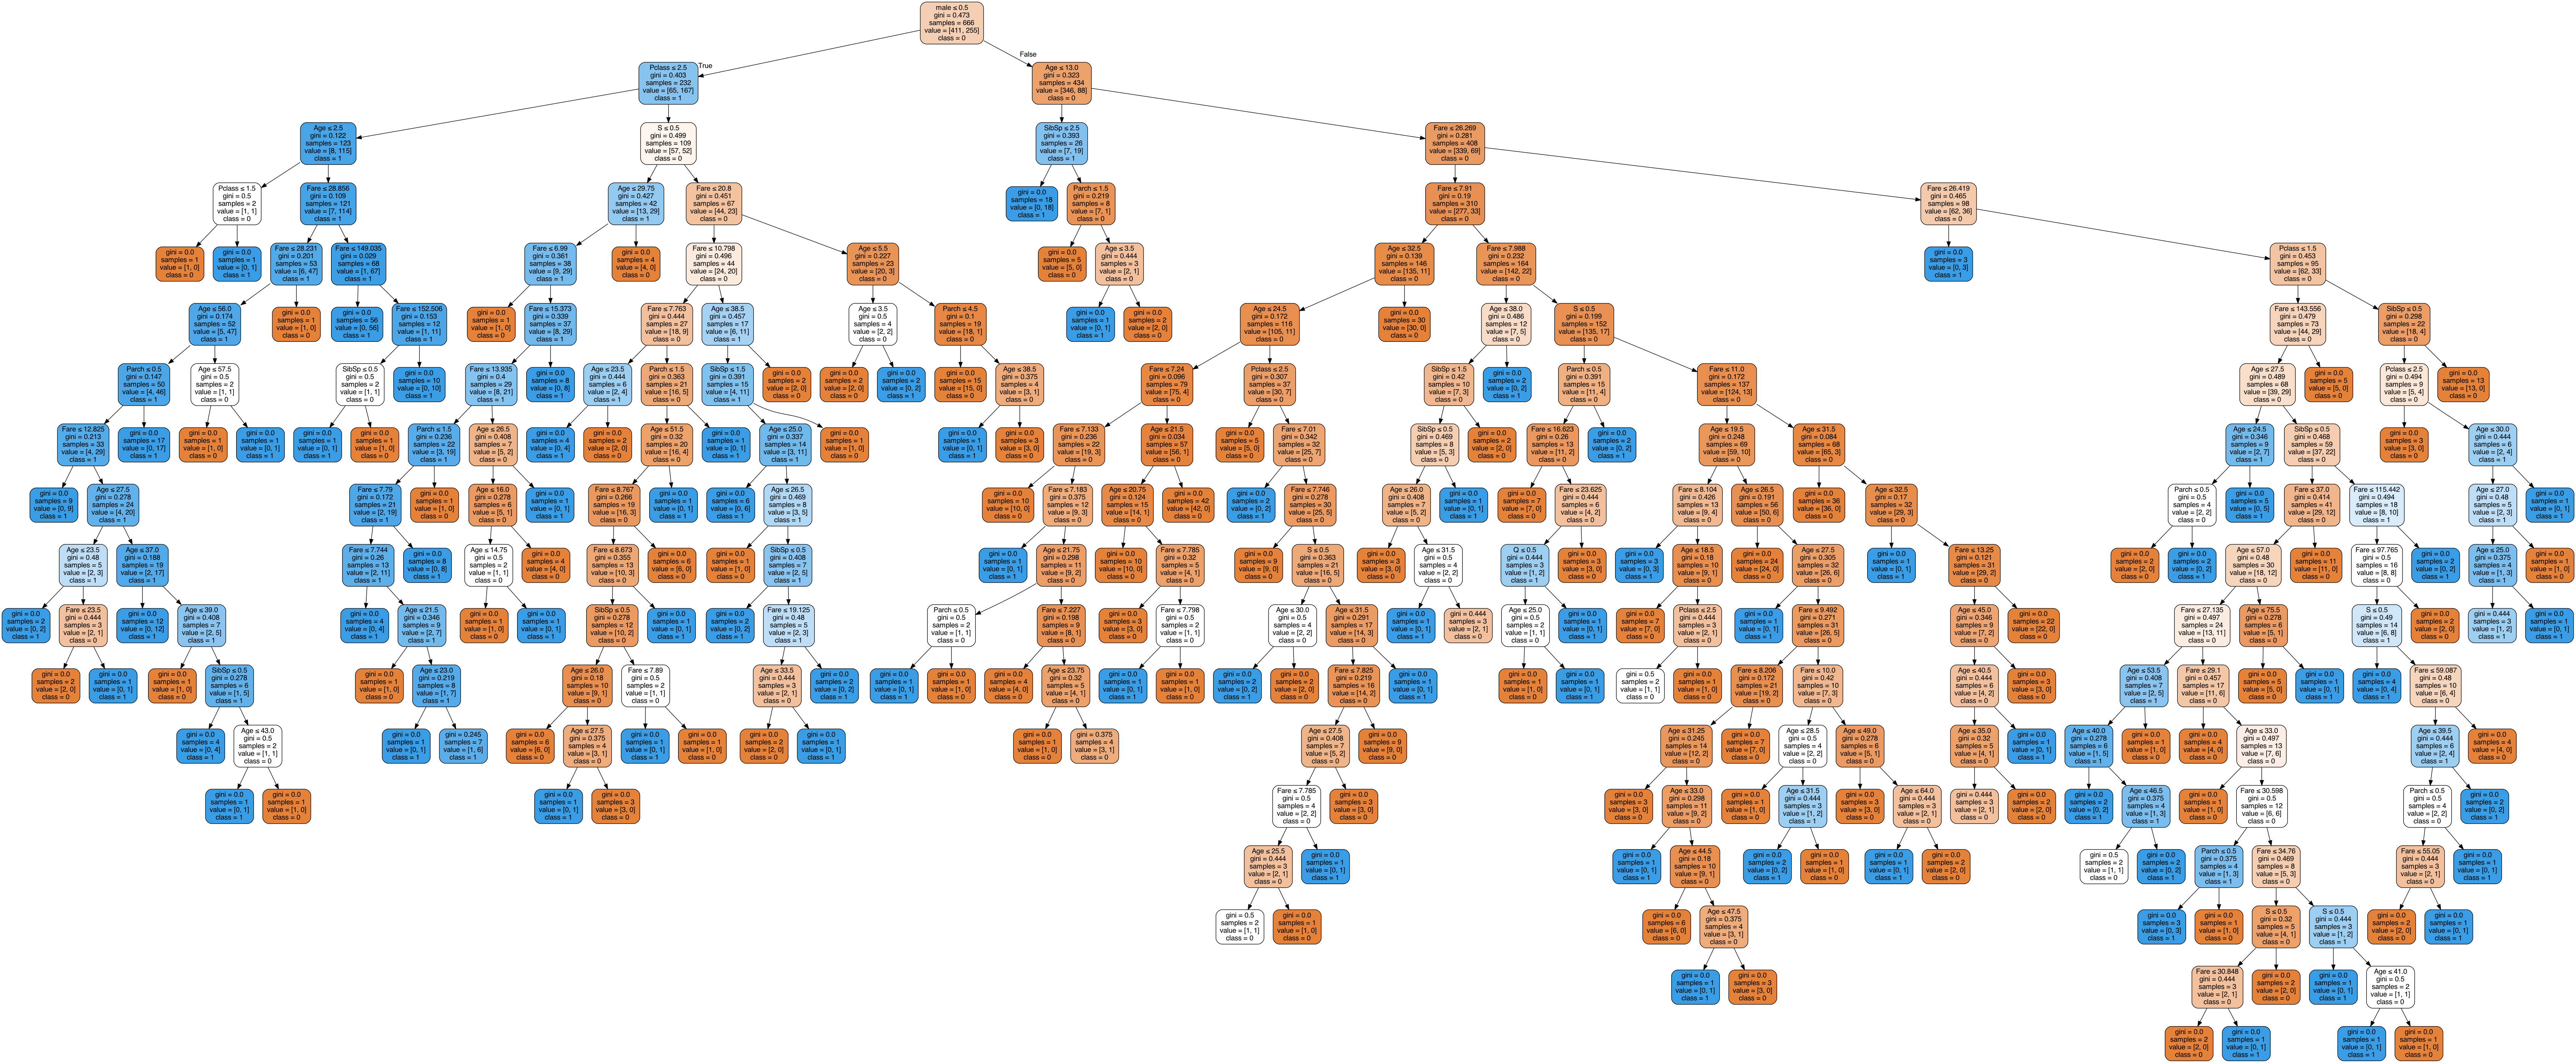

In [61]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())

Let's create another tree but make it really short by setting max_depth=3

In [62]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 0.7520661157024793
Testing F1 Score: 0.8074534161490684


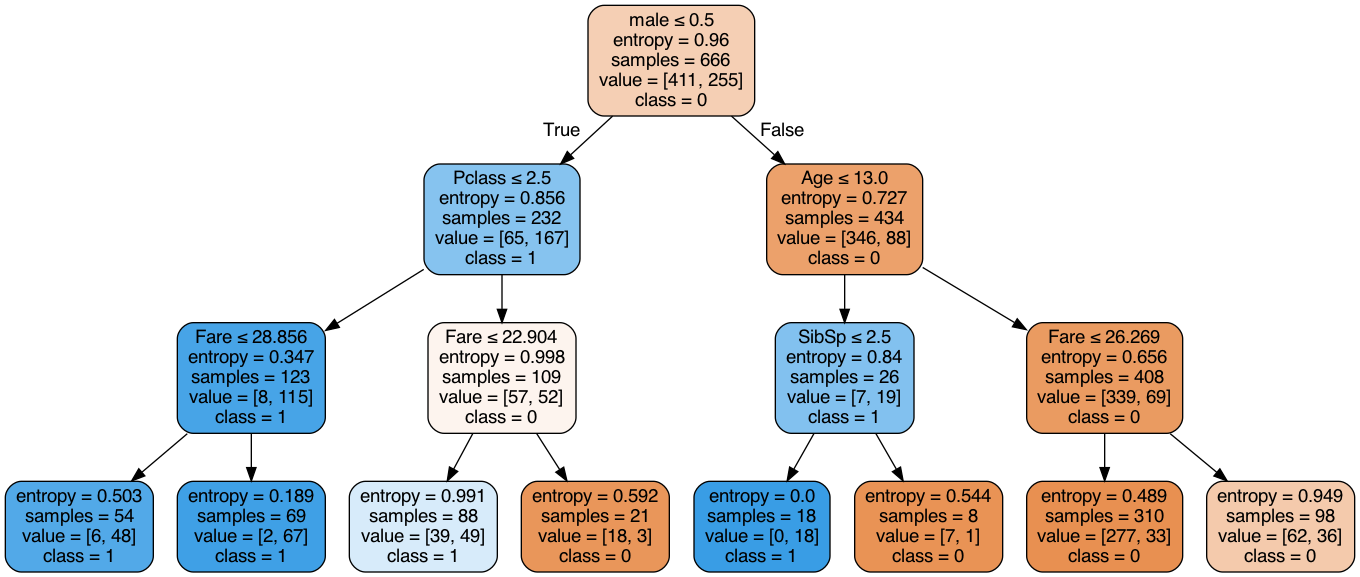

In [63]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_depth3.png')
Image(graph.create_png())

**Using this visualization and the scoring metrics, write a sentence comparing the model with no restrictions to the model with `max_depth=3`**

Answer: The model with no restrictions overfits to the training data and therefore performs poorly on unseen data.

## Tuning Hyperparameters

As you can see above, limiting the tree depth greatly improved our test performance and prevented our model from over fitting. 

- Is a max-depth of 3 the best parameter? 

- How would we figure this out?

## Cross-Validation


Earlier we mentioned some of the potential issues with the train/test split method. In order to avoid this, we can perform something called **cross validation**. It’s very similar to train/test split, but it’s applied to more subsets. Meaning, we split our data into k subsets, and train on k-1 one of those subset. What we do is to hold the last subset for test. We’re able to do it for each of the subsets.


<img src='./images/tts_cv.png' /> 

### K-Folds Cross Validation

In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

### Create Parameter Candidates


Before looking for which combination of parameter values produces the most accurate model, we must specify the different candidate values we want to try. In the code below we have a number of candidate parameter values, including different values for min_samples_leaf and max_depth. The grid search will try all combinations of parameter values and select the set of parameters which provides the most accurate model.

In [64]:
# creating our parameters to test
# create a parameters dictionare that will loop over a range of 1-20 for the 'max_depth' parameter
parameters={'max_depth': range(0,21)}


In [65]:
#create our estimaor
dt = DecisionTreeClassifier(random_state=1)

#create the instance of GridSearchCV
grid_tree = GridSearchCV(dt, parameters, cv=5, scoring='f1')

#fit the Gridsearch to our data
grid_tree.fit(X_train,y_train)

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': range(0, 21)}, scoring='f1')

In [66]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

0.7160100296995959
{'max_depth': 8}
DecisionTreeClassifier(max_depth=8, random_state=1)


**Now let's take that best model and see how it does on our testing data**

In [67]:
#Predict the response for test dataset
y_pred = grid_tree.best_estimator_.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7926829268292683


## Let's vizualize our best Decision Tree

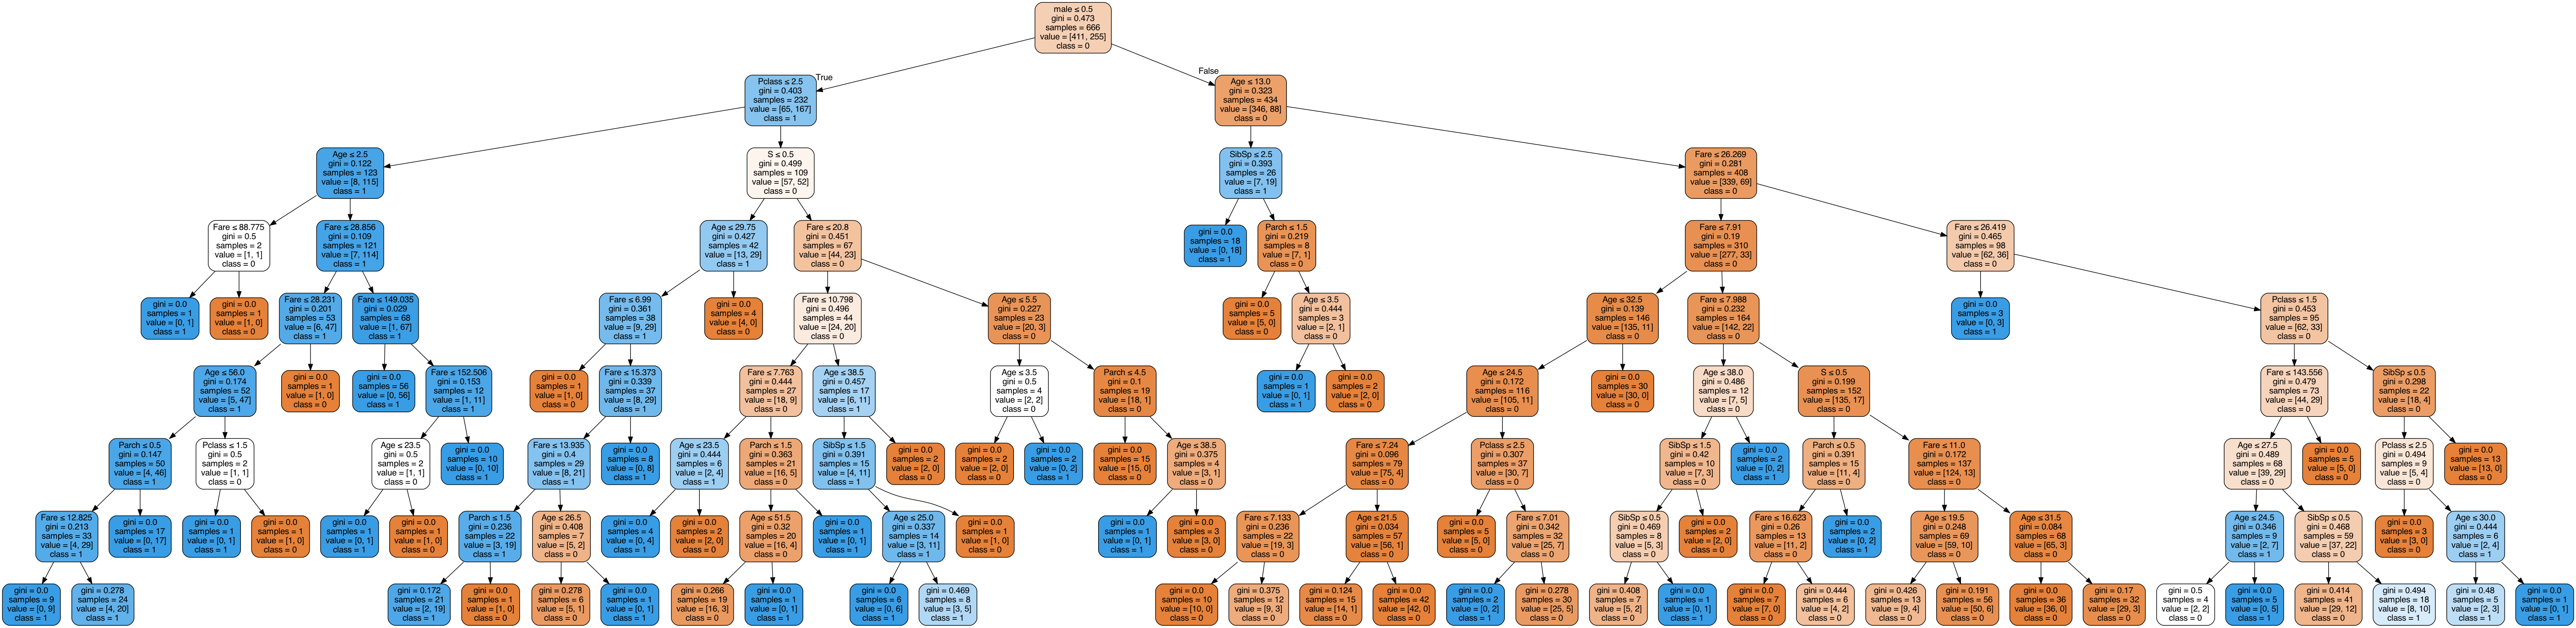

In [68]:
dot_data = StringIO()
export_graphviz(grid_tree.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic_gs.png')
Image(graph.create_png())

## Working with different scorers

The grid search object allows you to score the different models using different scoring metrics. Look into the documentation and see which parameters allow you to do this.  

The scorers can be either be one of the predefined metric strings or a scorer callable, like the one returned by make_scorer

In [70]:
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid= parameters,
                  scoring=scoring, cv=5, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 894, in fit
    X_idx_sorted=X_idx_sorted)
  File "/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/tree/_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  FitFailedWarning)
/Users/eric/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

In [71]:
results

{'mean_fit_time': array([0.00488639, 0.00376267, 0.00352116, 0.00368271, 0.00396366,
        0.00420055, 0.00413542, 0.00424929, 0.00435586, 0.00439038,
        0.00452499, 0.00517859, 0.00507922, 0.00457611, 0.00481277,
        0.00475073, 0.00456023, 0.00462437, 0.00474563, 0.00463939,
        0.00472083]),
 'std_fit_time': array([5.18705622e-04, 3.22374837e-04, 6.55040283e-05, 7.13130017e-05,
        2.25910701e-04, 1.93011030e-04, 2.06819145e-04, 8.98148325e-05,
        2.79179641e-04, 5.41989148e-05, 1.74728543e-04, 4.39013864e-04,
        2.32881693e-04, 1.73080236e-04, 3.52913794e-04, 2.53204752e-04,
        1.47426298e-04, 2.03580821e-04, 2.55658394e-04, 2.43854168e-04,
        4.21550872e-04]),
 'mean_score_time': array([0.        , 0.00474739, 0.00456276, 0.00516901, 0.00498419,
        0.00495281, 0.00482864, 0.00489235, 0.00472565, 0.00486541,
        0.00500798, 0.00502214, 0.00500011, 0.005126  , 0.00555887,
        0.00568295, 0.00499401, 0.00537081, 0.00489335, 0.005098

In [72]:
results['param_max_depth']

masked_array(data=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                   16, 17, 18, 19, 20],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False],
       fill_value='?',
            dtype=object)

## How the depth of the trees affects the  the bias versus variance tradeoff.

Below is a graph of the results across different `max_depth` values. 

/Users/eric/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


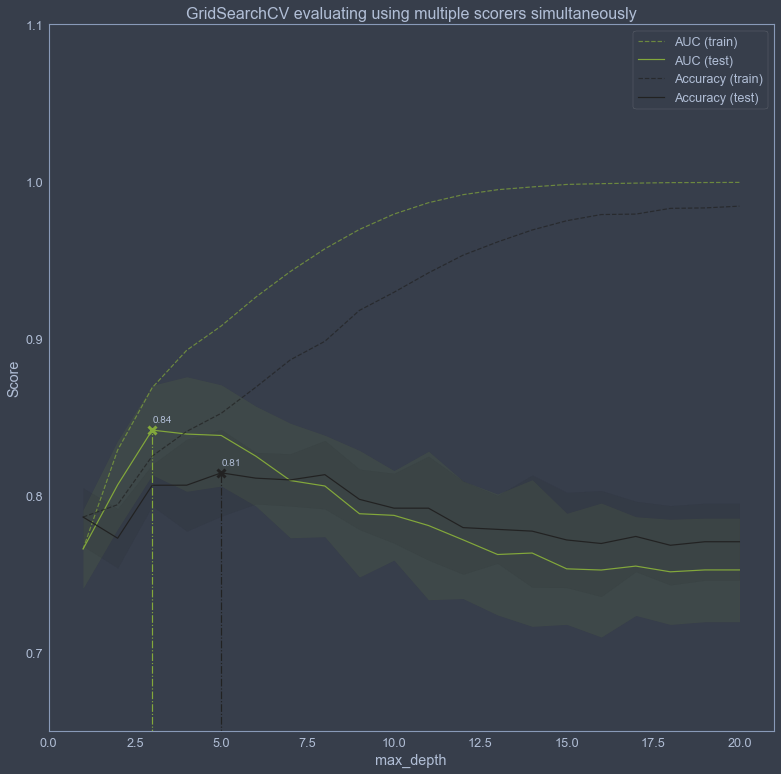

In [73]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("max_depth")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 21)
ax.set_ylim(0.65, 1.1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_max_depth'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show();

What happens to our model as we allow it to grow to deeper? 

___

## Your turn

Using the code examples from above, generate your own gridsearch model that tunes at least 3 different parameters for the decision tree. 


## Step 1:

Instantiate your classifier and set any parameters you want to be consistent across all model fittings

In [74]:
#create our estimaor
dct = DecisionTreeClassifier(random_state=1)


## Step 2:

Create the grid of parameters you want to test.

In [75]:
# creating our parameters to test
param_grid={'scoring': ['AUC', 'roc_auc', 'Accuracy', 'f1']}


## Step 3 :
    
Create your GridSearch object and fit it

In [76]:

#create the instance of GridSearchCV using the F1 metric for our scoring. 
grid_tree=GridSearchCV(____, ____, cv=____, scoring=____)



NameError: name '____' is not defined

In [ ]:
#fit the Gridsearch to our data
grid_tree.fit(X_train, y_train)

## Step 4:

Identify the best performing model

In [ ]:
# examine the best model

# Single best score achieved across all params (min_samples_split)
print(grid_tree.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(grid_tree.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid_tree.best_estimator_)

**Now let's take that best model and see how it does on our testing data**

# Step 5: 

Evaluate that model against the test set

In [ ]:
#Predict the response for test dataset
____ = ____.____.predict(____)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.____(____, ____))

# Step 6:

Using pickle, save the model to a file to use for later.  